In [1]:
!wget https://pjreddie.com/media/files/yolov2.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov2.cfg
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
!pip install plotbbox

--2023-04-21 06:06:39--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolov2.weights’

yolov2.weights      100%[===================>] 194.49M  58.3MB/s    in 3.6s    

2023-04-21 06:06:43 (54.4 MB/s) - ‘yolov2.weights’ saved [203934260/203934260]

--2023-04-21 06:06:43--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov2.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2726 (2.7K) [text/plain]
Saving to: ‘yolov2.cfg’

yolov2.cfg          100%[===================>]   2.66K  --.-KB/s    in 0s      


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from plotbbox import plotBBox

In [3]:
net = cv2.dnn.readNet('yolov2.cfg', 'yolov2.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

In [ ]:
label_table = open('coco.names').read().strip().split('\n')
color_table = list(np.random.randint(0, 255, size=(len(label_table), 3), dtype='uint8'))

In [8]:
def detect(img):
  h, w = img.shape[:2]
  blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)
  net.setInput(blob)

  for output in net.forward(output_layers):
      for detection in output:
          scores = detection[5:]
          class_id = np.argmax(scores)
          confidence = scores[class_id]
          if confidence > 0.5:
              box = detection[:4] * np.array([w, h, w, h])
              (center_x, center_y, w_b, h_b) = box.astype("int")
              x0 = int(center_x - w_b / 2)
              y0 = int(center_y - h_b / 2)
              w_b, h_b = int(w_b), int(h_b)
              plotBBox(img, x0, y0, x0+w_b, y0+w_b, color=[int(c) for c in color_table[class_id]], thickness=3, label=label_table[class_id])
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()  

In [12]:
img1 = cv2.imread('1.jpg')
img2 = cv2.imread('2.jpg')
img3 = cv2.imread('3.jpg')
img4 = cv2.imread('4.jpg')

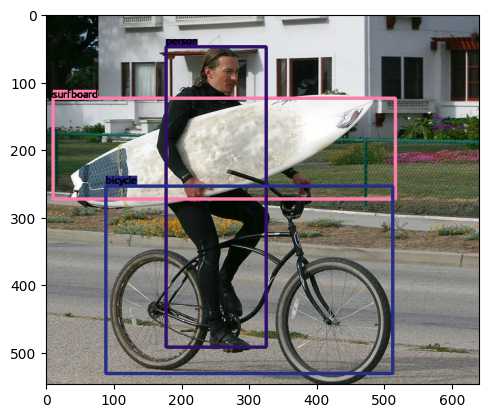

In [10]:
detect(img1)

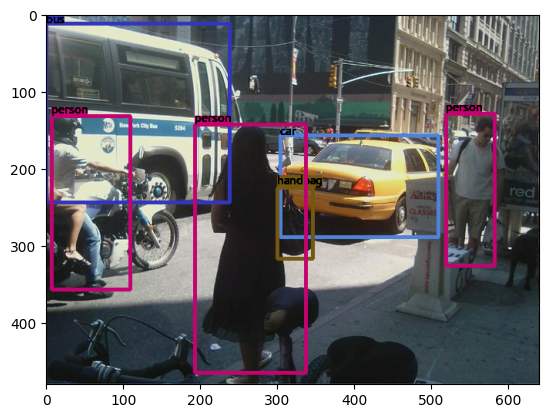

In [13]:
detect(img2)

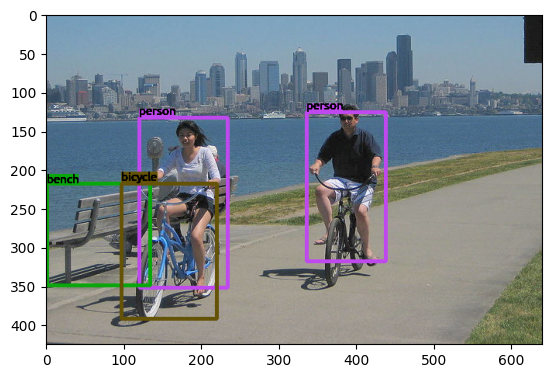

In [14]:
detect(img3)

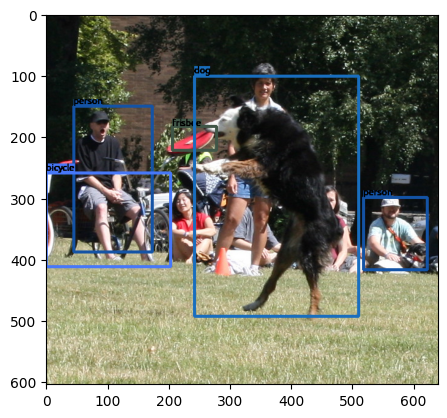

In [15]:
detect(img4)